In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision

import matplotlib.pyplot as plt

In [3]:
class XORDataset(Dataset):
    def __init__(self, size= 100):
        super().__init__()
        self.size = size
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        data = torch.randint(low= 0, high= 2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.float32)
        data += 0.1 * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [4]:
dataset = XORDataset(size=500)

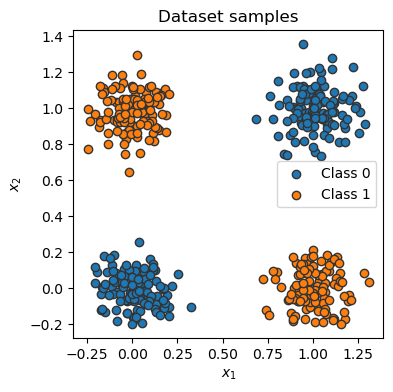

In [5]:
data = dataset.data.numpy()
label = dataset.label.numpy()
data_0 = data[label == 0]
data_1 = data[label == 1]

plt.figure(figsize=(4,4))
plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
plt.title("Dataset samples")
plt.ylabel(r"$x_2$")
plt.xlabel(r"$x_1$")
plt.legend()


In [6]:
data_loader = DataLoader(dataset, batch_size= 16, shuffle=True)

In [7]:
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.linear1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [8]:
model = Neural_Network()

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01) 

num_epochs = 100
for epoch in range(num_epochs):
    for data_inputs, data_labels in data_loader:
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

        loss = criterion(preds, data_labels)

        optimizer.zero_grad()
            
        loss.backward()

        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 3.4048
Epoch [20/100], Loss: 0.0692
Epoch [30/100], Loss: 1.4584
Epoch [40/100], Loss: 1.4349
Epoch [50/100], Loss: 5.5470
Epoch [60/100], Loss: 1.3927
Epoch [70/100], Loss: 3.2990
Epoch [80/100], Loss: 0.0091
Epoch [90/100], Loss: 3.2965
Epoch [100/100], Loss: 1.4086


In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                            train=True, 
                                            transform= torchvision.transforms.ToTensor()) # ,download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                            train=False, 
                                            transform= torchvision.transforms.ToTensor())

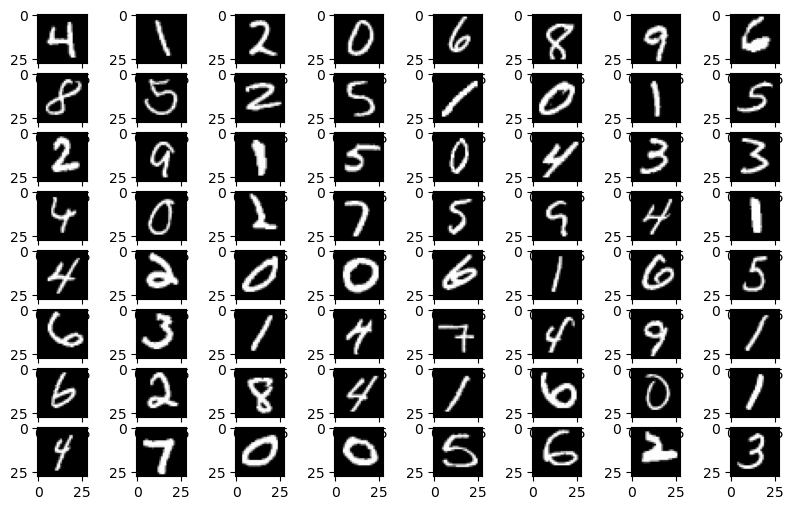

In [4]:
examples = iter(train_loader)
example_data, example_targets = next(examples)

plt.figure(figsize=(10,6))
# first_batch
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()


In [5]:
class MNIST_Neural_Network(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MNIST_Neural_Network, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out

In [20]:
def compute_loss(model, data_loader, device):
    current_loss = 0.
    with torch.no_grad():
        for i, (images, labels) in enumerate(data_loader):
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            current_loss += loss
    return current_loss / len(data_loader)

In [14]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 64
learning_rate = 0.001

In [15]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size= batch_size, 
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                            batch_size= batch_size, 
                                            shuffle=False)

In [17]:
import time

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MNIST_Neural_Network(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
n_total_batches = len(train_loader)

batch_loss_list = []
epoch_loss_list = []


for epoch in range(1):
    model.train()
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss_list.append(loss.item())
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')
    
    cost = compute_loss(model, train_loader, device)
    epoch_loss_list.append(cost)

    print(f'Epoch [{epoch+1}/{num_epochs}] Train Cost: {cost}')
    print("-" * 45)
    


Epoch [1/2], Batch [100/938], Loss: 0.2626
Epoch [1/2], Batch [200/938], Loss: 0.3117
Epoch [1/2], Batch [300/938], Loss: 0.2742
Epoch [1/2], Batch [400/938], Loss: 0.2010
Epoch [1/2], Batch [500/938], Loss: 0.1111
Epoch [1/2], Batch [600/938], Loss: 0.2337
Epoch [1/2], Batch [700/938], Loss: 0.2248
Epoch [1/2], Batch [800/938], Loss: 0.1021
Epoch [1/2], Batch [900/938], Loss: 0.0717
Epoch [1/2] Train Cost: 0.11419472843408585


In [31]:
len(train_loader)

938